In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [274]:
df = pd.read_csv("/Users/leehyungseok/Desktop/빅데이터분석/nc_stock_data.csv")

In [275]:
df.head()

,year,month,day,lineage,NCSOFT,KTJ,stock_price
0,2021,3,21,21,10,45,93.2
1,2021,3,28,34,21,30,83.4
2,2021,4,4,39,15,15,88.5
3,2021,4,11,30,10,20,90.6
4,2021,4,18,40,13,10,89.4


In [276]:
df.describe()

,year,month,day,lineage,NCSOFT,KTJ,stock_price
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,2021.211538,6.461538,15.961538,32.692308,22.500000,19.500000,70.458654
std,0.412384,3.483640,8.849419,12.528459,23.606662,22.523626,13.852131
min,2021.000000,1.000000,1.000000,11.000000,4.000000,0.000000,45.200000
25%,2021.000000,3.750000,8.750000,23.750000,8.000000,7.750000,58.275000
50%,2021.000000,6.500000,16.000000,31.500000,11.500000,13.000000,70.450000
75%,2021.000000,9.250000,23.250000,38.250000,23.750000,18.500000,82.725000
max,2022.000000,12.000000,31.000000,72.000000,100.000000,100.000000,93.200000


In [277]:
lineage = np.array(df['lineage'])
lineage

array([21, 34, 39, 30, 40, 36, 25, 15, 36, 23, 21, 29, 25, 25, 24, 46, 33,
       22, 25, 22, 38, 34, 16, 28, 31, 39, 20, 37, 32, 29, 18, 60, 61, 51,
       29, 35, 40, 37, 53, 27, 51, 35, 43, 11, 29, 17, 20, 34, 46, 37, 19,
       72])

In [278]:
stock_price = np.array(df['stock_price'])
stock_price

array([93.2 , 83.4 , 88.5 , 90.6 , 89.4 , 86.1 , 82.  , 85.  , 82.3 ,
       85.6 , 85.4 , 85.8 , 84.8 , 82.5 , 82.  , 83.4 , 77.8 , 80.9 ,
       80.9 , 81.2 , 79.  , 85.3 , 70.9 , 63.3 , 61.1 , 58.9 , 57.1 ,
       57.1 , 56.  , 58.2 , 61.9 , 62.1 , 59.5 , 78.6 , 76.  , 70.  ,
       69.  , 73.7 , 68.  , 65.6 , 64.3 , 60.6 , 58.3 , 56.5 , 56.7 ,
       53.6 , 54.  , 51.  , 49.25, 46.35, 45.95, 45.2 ])

In [279]:
ncsoft = np.array(df['NCSOFT'])
ncsoft

array([ 10,  21,  15,  10,  13,   8,   9,   9,   8,   7,   9,   5,   5,
         7,   9,   5,  11,   6,   8,   4,   7,  11,  63,  96,  73, 100,
        45,  56,  56,  27,  23,  22,  65,  63,  44,  26,  12,  14,   8,
         9,  10,   9,   8,   8,  15,   9,  16,  21,  27,  15,  13,  20])

In [280]:
ktj = np.array(df['KTJ'])
ktj

array([ 45,  30,  15,  20,  10,   2,   3,   7,  10,  15,  10,   2,   7,
        13,  13,  10,  29,  16,   8,  18,  18,  15,  47,  79,  35,  97,
        49,  30,  33,   8,   5,  11,  61,  14,  16,  14,   8,   3,   8,
         8,   0,   8,   8,   3,   5,   3,  14,   5,  13, 100,  13,   0])

In [281]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']]) # 세 컬럼을 모아 날짜 형식으로 변환

## 각 검색량의 그래프

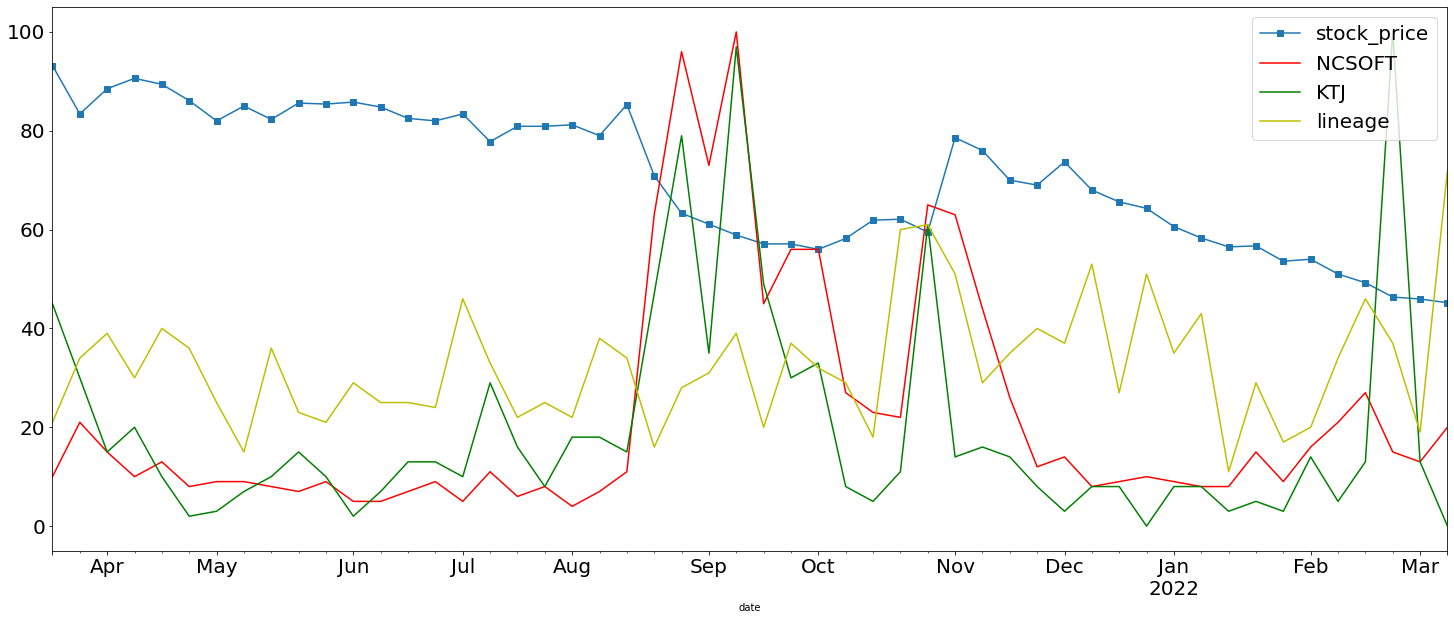

In [282]:
ax = df.plot(x='date', y= 'stock_price',marker='s')
ax2 = df.plot(x='date',y= 'NCSOFT', color='r',ax=ax,figsize=(25,10),fontsize=20)
ax3 = df.plot(x='date',y= 'KTJ',color = 'g', ax=ax2)
ax4 = df.plot(x='date',y= 'lineage',color = 'y', ax=ax3)
plt.legend(fontsize = 20)

## NCSOFT 검색량 편차 

In [283]:
mean = np.mean(ncsoft)
ncsoft_deviation = ncsoft - mean # ncsoft 검색량의 편차(측정값 - 평균) = 각 날짜의 ncsoft 검색량 - ncsoft 검색량의 평균
ncsoft_deviation

array([-12.5,  -1.5,  -7.5, -12.5,  -9.5, -14.5, -13.5, -13.5, -14.5,
       -15.5, -13.5, -17.5, -17.5, -15.5, -13.5, -17.5, -11.5, -16.5,
       -14.5, -18.5, -15.5, -11.5,  40.5,  73.5,  50.5,  77.5,  22.5,
        33.5,  33.5,   4.5,   0.5,  -0.5,  42.5,  40.5,  21.5,   3.5,
       -10.5,  -8.5, -14.5, -13.5, -12.5, -13.5, -14.5, -14.5,  -7.5,
       -13.5,  -6.5,  -1.5,   4.5,  -7.5,  -9.5,  -2.5])

## 김택진 검색량의 편차

In [284]:
mean = np.mean(ktj)
ktj_deviation = ktj - mean # 김택진 검색량의 편차 = 각 날짜의 김택진 검색량 - 김택진 검색량의 평균
ktj_deviation

array([ 25.5,  10.5,  -4.5,   0.5,  -9.5, -17.5, -16.5, -12.5,  -9.5,
        -4.5,  -9.5, -17.5, -12.5,  -6.5,  -6.5,  -9.5,   9.5,  -3.5,
       -11.5,  -1.5,  -1.5,  -4.5,  27.5,  59.5,  15.5,  77.5,  29.5,
        10.5,  13.5, -11.5, -14.5,  -8.5,  41.5,  -5.5,  -3.5,  -5.5,
       -11.5, -16.5, -11.5, -11.5, -19.5, -11.5, -11.5, -16.5, -14.5,
       -16.5,  -5.5, -14.5,  -6.5,  80.5,  -6.5, -19.5])

## 리니지 검색량의 편차

In [285]:
mean = np.mean(lineage)
lineage_deviation = lineage - mean # 김택진 검색량의 편차 = 각 날짜의 김택진 검색량 - 김택진 검색량의 평균
lineage_deviation

array([-11.69230769,   1.30769231,   6.30769231,  -2.69230769,
         7.30769231,   3.30769231,  -7.69230769, -17.69230769,
         3.30769231,  -9.69230769, -11.69230769,  -3.69230769,
        -7.69230769,  -7.69230769,  -8.69230769,  13.30769231,
         0.30769231, -10.69230769,  -7.69230769, -10.69230769,
         5.30769231,   1.30769231, -16.69230769,  -4.69230769,
        -1.69230769,   6.30769231, -12.69230769,   4.30769231,
        -0.69230769,  -3.69230769, -14.69230769,  27.30769231,
        28.30769231,  18.30769231,  -3.69230769,   2.30769231,
         7.30769231,   4.30769231,  20.30769231,  -5.69230769,
        18.30769231,   2.30769231,  10.30769231, -21.69230769,
        -3.69230769, -15.69230769, -12.69230769,   1.30769231,
        13.30769231,   4.30769231, -13.69230769,  39.30769231])

## 데이터프레임에 저장

In [286]:
df['lineage_deviation'] = lineage_deviation
df['ktj_deviation'] = ktj_deviation
df['ncsoft_deviation'] = ncsoft_deviation
df

,year,month,day,lineage,NCSOFT,KTJ,stock_price,date,lineage_deviation,ktj_deviation,ncsoft_deviation
0,2021,3,21,21,10,45,93.20,2021-03-21,-11.692308,25.5,-12.5
1,2021,3,28,34,21,30,83.40,2021-03-28,1.307692,10.5,-1.5
2,2021,4,4,39,15,15,88.50,2021-04-04,6.307692,-4.5,-7.5
3,2021,4,11,30,10,20,90.60,2021-04-11,-2.692308,0.5,-12.5
4,2021,4,18,40,13,10,89.40,2021-04-18,7.307692,-9.5,-9.5
5,2021,4,25,36,8,2,86.10,2021-04-25,3.307692,-17.5,-14.5
6,2021,5,2,25,9,3,82.00,2021-05-02,-7.692308,-16.5,-13.5
7,2021,5,9,15,9,7,85.00,2021-05-09,-17.692308,-12.5,-13.5
8,2021,5,16,36,8,10,82.30,2021-05-16,3.307692,-9.5,-14.5
9,2021,5,23,23,7,15,85.60,2021-05-23,-9.692308,-4.5,-15.5


## 각 검색량의 편차 그래프

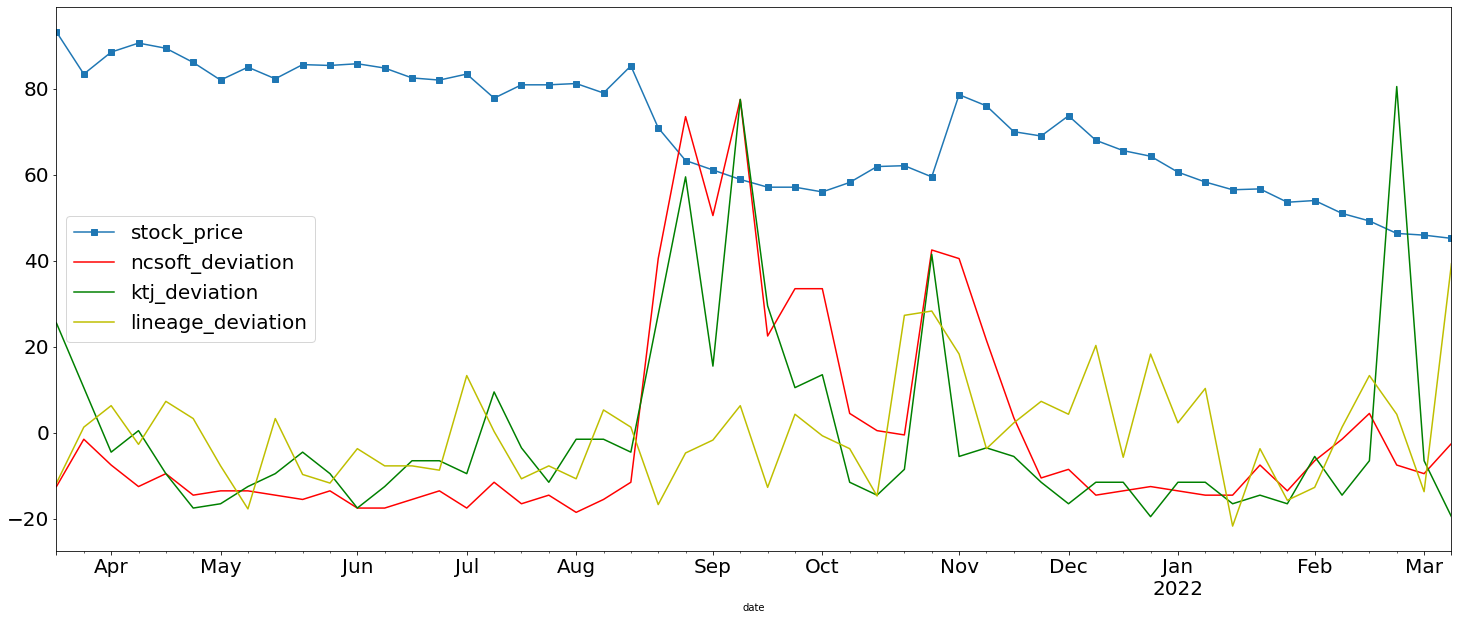

In [287]:
ax = df.plot(x='date', y= 'stock_price',marker='s')
ax2 = df.plot(x='date',y= 'ncsoft_deviation', color='r',ax=ax,figsize=(25,10),fontsize=20)
ax3 = df.plot(x='date',y= 'ktj_deviation',color = 'g', ax=ax2)
ax4 = df.plot(x='date',y= 'lineage_deviation',color = 'y', ax=ax3)
plt.legend(fontsize = 20)

In [288]:
df.describe()

,year,month,day,lineage,NCSOFT,KTJ,stock_price,lineage_deviation,ktj_deviation,ncsoft_deviation
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000
mean,2021.211538,6.461538,15.961538,32.692308,22.500000,19.500000,70.458654,-1.093143e-15,0.000000,0.000000
std,0.412384,3.483640,8.849419,12.528459,23.606662,22.523626,13.852131,1.252846e+01,22.523626,23.606662
min,2021.000000,1.000000,1.000000,11.000000,4.000000,0.000000,45.200000,-2.169231e+01,-19.500000,-18.500000
25%,2021.000000,3.750000,8.750000,23.750000,8.000000,7.750000,58.275000,-8.942308e+00,-11.750000,-14.500000
50%,2021.000000,6.500000,16.000000,31.500000,11.500000,13.000000,70.450000,-1.192308e+00,-6.500000,-11.000000
75%,2021.000000,9.250000,23.250000,38.250000,23.750000,18.500000,82.725000,5.557692e+00,-1.000000,1.250000
max,2022.000000,12.000000,31.000000,72.000000,100.000000,100.000000,93.200000,3.930769e+01,80.500000,77.500000


In [289]:
df.var()

/var/folders/24/8d6l8hk525j_cdp9dvyg4cwh0000gn/T/ipykernel_2662/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


year                   0.170060
month                 12.135747
day                   78.312217
lineage              156.962293
NCSOFT               557.274510
KTJ                  507.313725
stock_price          191.881541
lineage_deviation    156.962293
ktj_deviation        507.313725
ncsoft_deviation     557.274510
dtype: float64

## NCSOFT 검색량 분산

In [290]:
ncsoft_var = np.var(ncsoft) # NCSOFT의 검색량은 대부분 평균과 멀리 떨어져있음
ncsoft_var

546.5576923076923

In [296]:
np.max(ncsoft) - np.min(ncsoft)

96

## 김택진 검색량 분산 

In [291]:
ktj_var = np.var(ktj) # 김택진의 검색량은 대부분 평균과 멀리 떨어져있지만 NCSOFT 만큼 퍼져있지않음
ktj_var

497.5576923076923

In [300]:
np.max(ktj) - np.min(ktj) # 김택진 검색량의 최댓값과 최소값의 차이가 NCSOFT 검색량의 최댓값과 최소값의 차이보다 크지만 분산은 크지않을 수도 있다.

100

## 리니지 검색량 분산

In [292]:
lineage_var = np.var(lineage) # 리니지의 검색량은 NCSOFT 와 김택진과 비교하면 평균에 밀집해있음
lineage_var

153.94378698224853

In [301]:
np.max(lineage) - np.min(lineage) # NCSOFT 와 김택진을 비교했을 때 확실히 작다.

61

## 가설 : NCSOFT의 주가는  비교적 리니지의 검색량보다 NCSOFT, 김택진의 검색량이 영향을 더 끼친다.